In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes', labelsize=20)

In [2]:
# Import the line measurements data
# Define the file path
data_file_path = "/Users/xwou/Dropbox/"

# Import the data from Ana's line measurements
all_ana = np.genfromtxt(data_file_path+"smss17_line_measurements_ana", skip_header=2)

# Import the data from Xiaowei's line measurements
all_xo = np.genfromtxt(data_file_path+"smss17_line_measurements_xo", skip_header=2)

In [3]:
# Cross-match the wavelengths (assumed and checked no identical wavelength in linelist)
# Get the number of common lines with EW measured
N_common = len(np.intersect1d(all_ana[:,1],all_xo[:,1],assume_unique=True))
print(N_common, "lines measured in both files.")

# Create empty array to store the cross-matched wavelengths and EWs
all_common = np.zeros([N_common,10])

# Perform cross match and record the indices
_, ind_ana, ind_xo = np.intersect1d(all_ana[:,1],all_xo[:,1],assume_unique=True,return_indices=True)

# Sort the indices to keep the original order of the linelist
ind_ana, ind_xo = np.sort(ind_ana),np.sort(ind_xo)

# Combine and store the values into the new array (1-4 col same; 5-7 Ana's value; 8-10 Xiaowei's value)
for i in range(10):
    if i < 7:
        all_common[:,i] = all_ana[ind_ana,i]
    else:
        all_common[:,i] = all_xo[ind_xo,i-3]

292 lines measured in both files.


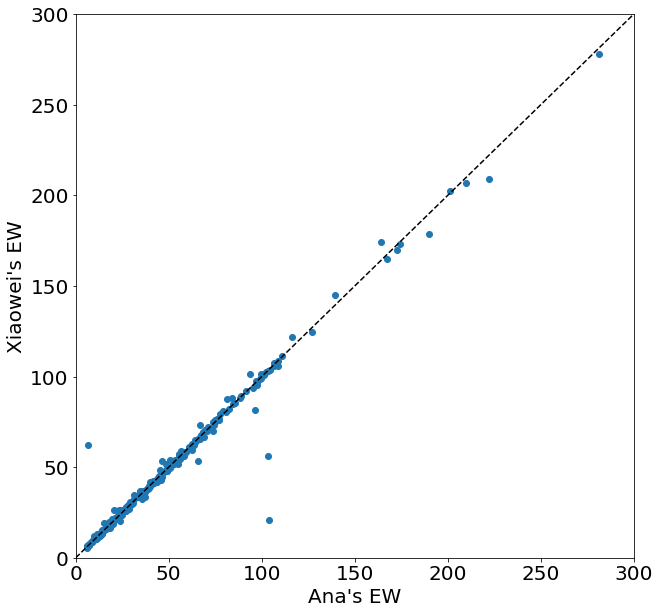

In [4]:
# Plot the results directly against each other
f = plt.figure(figsize=[10,10])
plt.scatter(all_common[:,4],all_common[:,7])
plt.xlabel('Ana\'s EW')
plt.ylabel('Xiaowei\'s EW')
plt.plot([0,500],[0,500],'k--')
plt.xlim([0,300])
plt.ylim([0,300])
plt.show()
f.savefig("ew_xo_vs_ana.pdf",bbox_inches='tight')

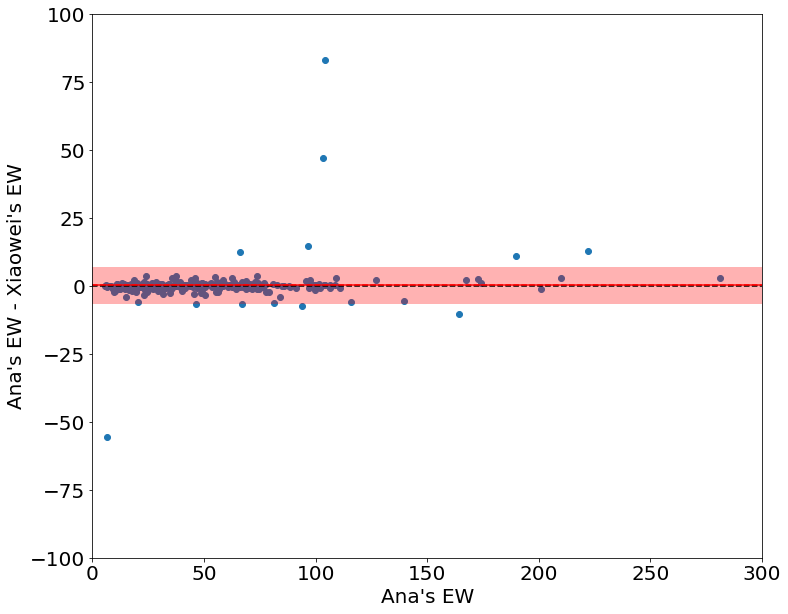

In [5]:
# plot the difference between them vs Ana's EW
# plus calculate the standard deviation and standard error (std err = stddev/rootN)

diff_common = all_common[:,4]-all_common[:,7]
diff_mean = np.mean(diff_common)
diff_std = np.std(diff_common)
diff_stderr = diff_std/np.sqrt(N_common)

f = plt.figure(figsize=[12,10])
plt.scatter(all_common[:,4],diff_common)
plt.xlabel('Ana\'s EW')
plt.ylabel('Ana\'s EW - Xiaowei\'s EW')
plt.plot([0,500],[0,0],'k--')
plt.plot([0,500],np.ones(2)*diff_mean,'r--')
plt.fill_between([0,500],np.ones(2)*(diff_mean+diff_std),np.ones(2)*(diff_mean-diff_std),facecolor='red',alpha=0.3)
plt.fill_between([0,500],np.ones(2)*(diff_mean+diff_stderr),np.ones(2)*(diff_mean-diff_stderr),facecolor='red',alpha=0.7)
plt.xlim([0,300])
plt.ylim([-100,100])
plt.show()
f.savefig('ew_diff_vs_ana.pdf',bbox_inches='tight')

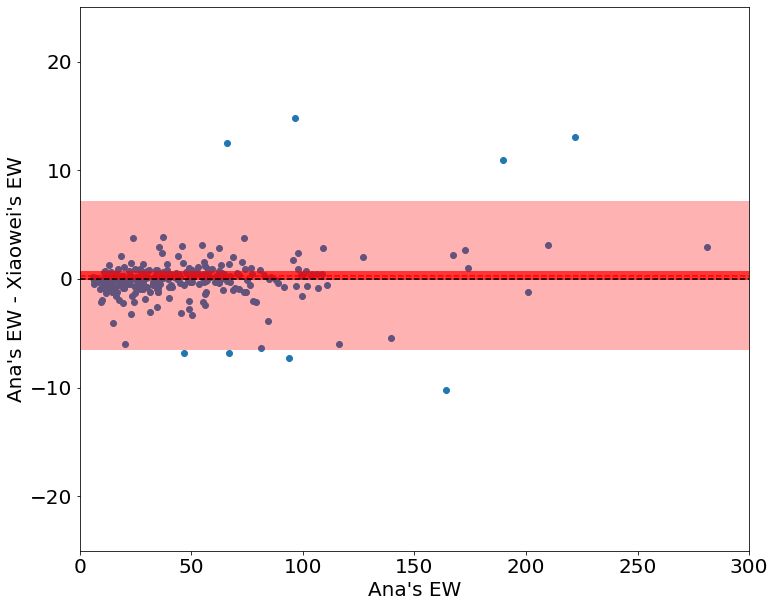

In [6]:
f = plt.figure(figsize=[12,10])
plt.scatter(all_common[:,4],diff_common)
plt.xlabel('Ana\'s EW')
plt.ylabel('Ana\'s EW - Xiaowei\'s EW')
plt.plot([0,500],[0,0],'k--')
plt.plot([0,500],np.ones(2)*diff_mean,'r--')
plt.fill_between([0,500],np.ones(2)*(diff_mean+diff_std),np.ones(2)*(diff_mean-diff_std),facecolor='red',alpha=0.3)
plt.fill_between([0,500],np.ones(2)*(diff_mean+diff_stderr),np.ones(2)*(diff_mean-diff_stderr),facecolor='red',alpha=0.7)
plt.xlim([0,300])
plt.ylim([-25,25])
plt.show()
f.savefig('ew_diff_vs_ana_zoomed.pdf',bbox_inches='tight')

In [18]:
print(diff_mean,diff_std,diff_stderr)

# Take only delta <= 9 for calculation
diff_common = all_common[:,4]-all_common[:,7]
temp_ind = np.where(abs(diff_common) <= 9)[0]
diff_mean_less9 = np.mean(diff_common[temp_ind])
diff_std_less9 = np.std(diff_common[temp_ind])
diff_stderr_less9 = diff_std_less9/np.sqrt(len(temp_ind))

print(diff_mean_less9,diff_std_less9,diff_stderr_less9)

0.30770547945205495 6.8521420914940725 0.4009912855696799
-0.12388692579505294 1.5434880011937462 0.09175083808417579


In [54]:
print(np.shape(all_ana),np.shape(all_xo))

(345, 7) (301, 7)


In [7]:
# Output the common line measurements
f = open('common_line_measurements.txt', 'w')
f.write("%7s %10s %5s %6s %6s %6s %8s %6s %6s %8s \n"
        %('species','wavelength','expot','loggf','EW','logeps','e_logeps','EW','logeps','e_logeps'))

for i in range(N_common):
    f.write('%7.1f %10.3f %5.3f %6.3f %6.2f %6.3f %8.3f %6.2f %6.3f %8.3f \n'
            %(all_common[i,0],all_common[i,1],all_common[i,2],all_common[i,3],all_common[i,4],all_common[i,5],
             all_common[i,6],all_common[i,7],all_common[i,8],all_common[i,9]))
f.close()

In [13]:
# Output the extra lines in Ana's/Xiaowei's measurements
N_ana = len(all_ana[:,0])
N_xo = len(all_xo[:,0])

ind_extra_ana = np.delete(np.arange(N_ana),ind_ana)
ind_extra_xo = np.delete(np.arange(N_xo),ind_xo)

f1 = open('extra_line_measurements_ana.txt', 'w')
f2 = open('extra_line_measurements_xo.txt', 'w')
f1.write("%7s %10s %5s %6s %6s %6s %8s\n"
        %('species','wavelength','expot','loggf','EW','logeps','e_logeps'))
f2.write("%7s %10s %5s %6s %6s %6s %8s\n"
        %('species','wavelength','expot','loggf','EW','logeps','e_logeps'))

for i in ind_extra_ana:
    f1.write('%7.1f %10.3f %5.3f %6.3f %6.2f %6.3f %8.3f\n'
            %(all_ana[i,0],all_ana[i,1],all_ana[i,2],all_ana[i,3],all_ana[i,4],all_ana[i,5],
             all_ana[i,6]))

for i in ind_extra_xo:
    f2.write('%7.1f %10.3f %5.3f %6.3f %6.2f %6.3f %8.3f\n'
            %(all_xo[i,0],all_xo[i,1],all_xo[i,2],all_xo[i,3],all_xo[i,4],all_xo[i,5],
             all_xo[i,6]))

f1.close()
f2.close()

In [15]:
# Out put the lines with difference greater than 5
ind_diff5 = np.where(abs(diff_common) > 5)[0]

f = open('common_line_measurements_diff5.txt', 'w')
f.write("%7s %10s %5s %6s %6s %6s %8s %6s %6s %8s \n"
        %('species','wavelength','expot','loggf','EW','logeps','e_logeps','EW','logeps','e_logeps'))

for i in ind_diff5:
    f.write('%7.1f %10.3f %5.3f %6.3f %6.2f %6.3f %8.3f %6.2f %6.3f %8.3f \n'
            %(all_common[i,0],all_common[i,1],all_common[i,2],all_common[i,3],all_common[i,4],all_common[i,5],
             all_common[i,6],all_common[i,7],all_common[i,8],all_common[i,9]))
f.close()